### Analizando los Salarios en Ciencia de Datos en 2023

Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

In [2]:
import pandas as pd

# Cargar los datos
file_path = '../data/ds_salaries.csv'
df = pd.read_csv(file_path)

# Revisar la estructura de los datos
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### 1. Limpieza de datos con Python:
- Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
- Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.


In [21]:
# Revisar si existen diplicados y removerlos del dataframe
duplicados = df.duplicated().sum()
df_limpio = df.drop_duplicates()

# Ver tipo de datos
data_types = df_limpio.dtypes

duplicados, data_types

(1171,
 work_year              int64
 experience_level      object
 employment_type       object
 job_title             object
 salary                 int64
 salary_currency       object
 salary_in_usd          int64
 employee_residence    object
 remote_ratio           int64
 company_location      object
 company_size          object
 dtype: object)


* Se detectaron y eliminaron 1171 registros duplicados.
* Los tipos de datos fueron verificados y son correctos:
   - Variables categóricas: `object`.
   - Variables numéricas: `int64`.

- Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).


In [29]:
#  Revisar valores unicos en las columnas categoricas para verificar la consistencia
columnas_categoricas = ['experience_level', 'employment_type', 'job_title', 
                       'salary_currency', 'employee_residence', 
                       'company_location', 'company_size']

valores_unicos = {col: df_limpio[col].unique() for col in columnas_categoricas}

valores_unicos

{'experience_level': array(['SE', 'MI', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'FL', 'PT'], dtype=object),
 'job_title': array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
        'Applied Scientist', 'Data Analyst', 'Data Modeler',
        'Research Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Machine Learning Engineer',
        'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
        'Data Quality Analyst', 'Compliance Data Analyst',
        'Data Architect', 'Applied Machine Learning Engineer',
        'AI Developer', 'Research Scientist', 'Data Analytics Manager',
        'Business Data Analyst', 'Applied Data Scientist',
        'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
        'Head of Data', 'Data Science Manager', 'Data Manager',
        'Machine Learning Researcher', 'Big Data Engineer',
        'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
        'Dire

Los valores de las columnas categoricas son consistentes y no presentan variaciones inusuales. Tampoco hay problemas de mayusculas o errores tipográficos

- Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.


In [110]:
valores_na = df_limpio.isna().sum()
valores_na

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [25]:
# Verificar valores faltantes
valores_nulos = df_limpio.isnull().sum()
valores_nulos

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No hay valores faltantes en ninguna columna

- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [33]:
# Salario en usd
salary_usd_describe = df_limpio['salary_in_usd'].describe()

salary_usd_describe

count     2584.00
mean    133409.28
std      67136.84
min       5132.00
25%      84975.00
50%     130000.00
75%     175000.00
max     450000.00
Name: salary_in_usd, dtype: float64

In [43]:
# Obtener estadísticas descriptivas del salario por nivel de experiencia (USD)
salary_by_experience_usd = df_limpio.groupby('experience_level')['salary_in_usd'].describe()
print(salary_by_experience_usd)


                   count      mean      std      min       25%       50%  \
experience_level                                                           
EN                270.00  72648.69 51630.63  5409.00  31890.00  61900.00   
EX                 96.00 191078.21 71003.54 15000.00 144211.50 189618.50   
MI                664.00 101828.78 56825.13  5132.00  62486.75  95000.00   
SE               1554.00 153897.44 60450.01  8000.00 112000.00 148800.00   

                       75%       max  
experience_level                      
EN               100000.00 300000.00  
EX               235000.00 416000.00  
MI               134000.00 450000.00  
SE               190150.00 423834.00  


- Entry Level (EN): Es probable que el salario para este nivel de experiencia sea el más bajo en el rango, ya que corresponde a personas con menos nivel de experiencia-
- Mid Level (MI): El salario en este nivel debería mostrar un incremento en comparación con el nivel de entrada. Esto se debe a la mayor experiencia y habilidades adquiridas.
- Senior Level (SE): Los salarios en este nivel tienden a ser más altos.
- Executive Level (EX): Los salarios ejecutivos suelen ser los más altos.

Al parecer hay algunos datos anómalos, como un trabajador en entry level que gana 300000 USD y uno en Mid level que gana 450000 USD. Se procede a aplicar un filtro de salarios mayores o iguales a 300.000 para estas categorías.

In [101]:
df_limpio = df_limpio[~((df_limpio['experience_level'].isin(['EN', 'MI'])) & (df_limpio['salary_in_usd'] >= 300000))]

- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).
- Para filtrar los datos anómalos utilizaremos el método de rango intercuartílico (IQR). Se basa en los cuartiles Q1 y Q3 que dividen los datos en percentiles del 25% y 75%. Los valores que están por fuera de 1.5 veces el IQR se consideran "outliers". Referencia: https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/

In [119]:
# Lista de niveles de experiencia
experience_levels = df_limpio['experience_level'].unique()

# Aplicar IQR para detectar outliers por cada nivel de experiencia
for level in experience_levels:
    level_data = df_limpio[df_limpio['experience_level'] == level]
    
    # Calcular el IQR para el salario en USD
    Q1 = level_data['salary_in_usd'].quantile(0.25)
    Q3 = level_data['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los outliers
    outliers = level_data[(level_data['salary_in_usd'] < lower_bound) | (level_data['salary_in_usd'] > upper_bound)]

outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S


In [103]:
# Eliminar los outliers detectados
df_limpio_sin_outliers = df_limpio[~df_limpio.index.isin(outliers.index)]



### 2. Exploración de datos con Python


- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


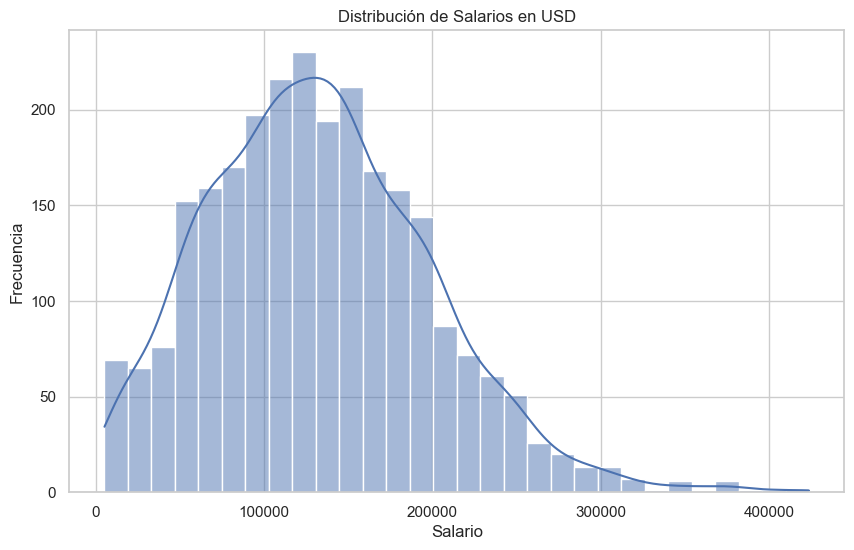

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma de la variable salario en USD
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio_sin_outliers['salary_in_usd'], bins=30, kde=True)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()
# Cmabiar color de linea para q resalte

El histograma muestra la distribución de los salarios en USD, luego de limpiar los datos y eliminar outliers. Se puede observar que la mayor parte de los salarios se concentra entre 100.000 y 150.00 USD, lo que sugiere que la mayoría de los trabajadores en ciencias de datos tienen un salario comprendido en ese rango. Existe una cola larga hacia la derecha que representa a los trabajadores que ganan considerablemente más, pero se encuentran en menor proporción

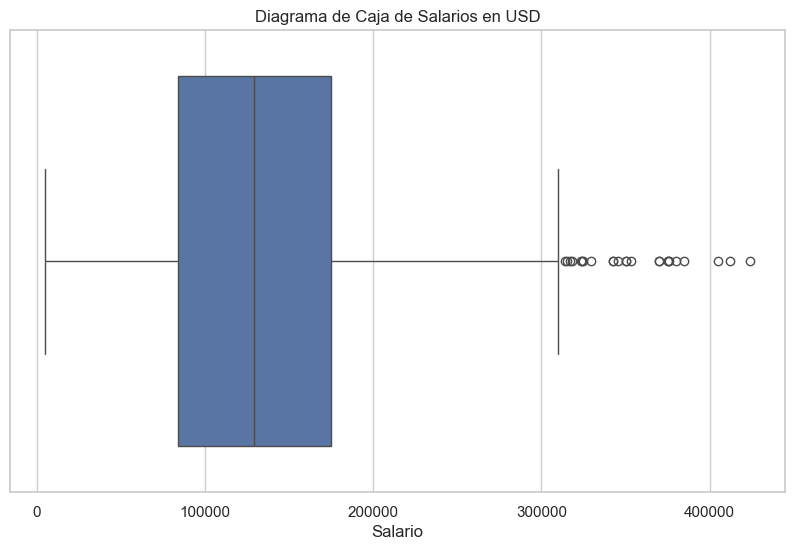

In [105]:

# Crear un boxplot para la variable salario en USD
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpio_sin_outliers['salary_in_usd'])
plt.title('Diagrama de Caja de Salarios en USD')
plt.xlabel('Salario')
plt.show()


El boxplot muestra la distribución de los salarios en USD, luego de limpiar los datos y eliminar outliers. Se observa que los salarios se distribuyen en la mayoría de los casos entre 85,000 y 175,000 USD, con algunos valores altos por encima de los 300,000 USD. La presencia de estos valores altos sugiere que pertenecen a trabajadores con puestos más altos pero están en menor proporción

- Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

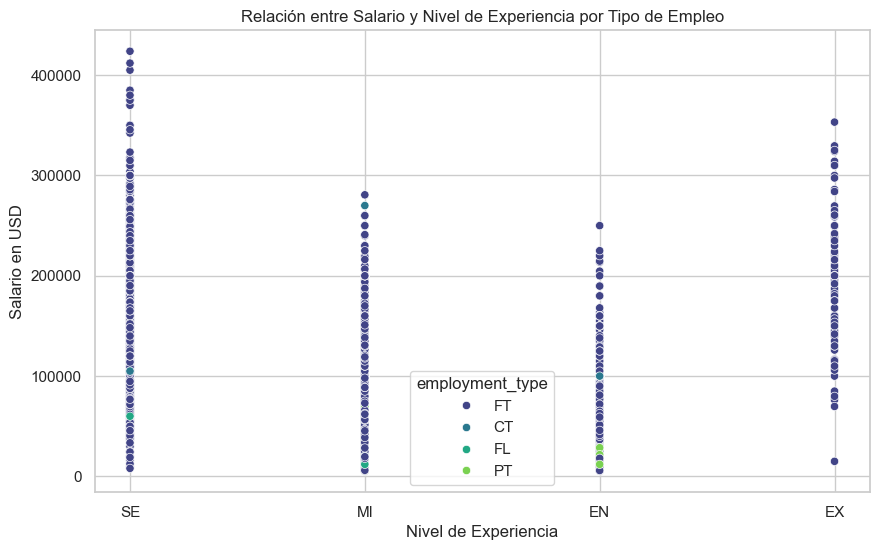

In [106]:
# Scatter plot para visualizar la relación entre el salario y el nivel de experiencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=df_limpio_sin_outliers, palette='viridis')
plt.title('Relación entre Salario y Nivel de Experiencia por Tipo de Empleo')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.show()


Este gráfico de dispersión muestra la relación entre el salario y el nivel de experiencia, diferenciando el tipo de empleo (empleo a tiempo completo, contrato, freelance y part-time). A medida que el nivel de experiencia aumenta, los salarios también tienden a ser más altos, lo cual es un patrón esperado. Además, observamos que el tipo de empleo también influye: los trabajos a tiempo completo (FT) parecen estar mejor remunerados, mientras que otros tipos como freelance (FL) o contratos (CT) tienen salarios más variables, siendo part-time el trabajo con menor remuneración.

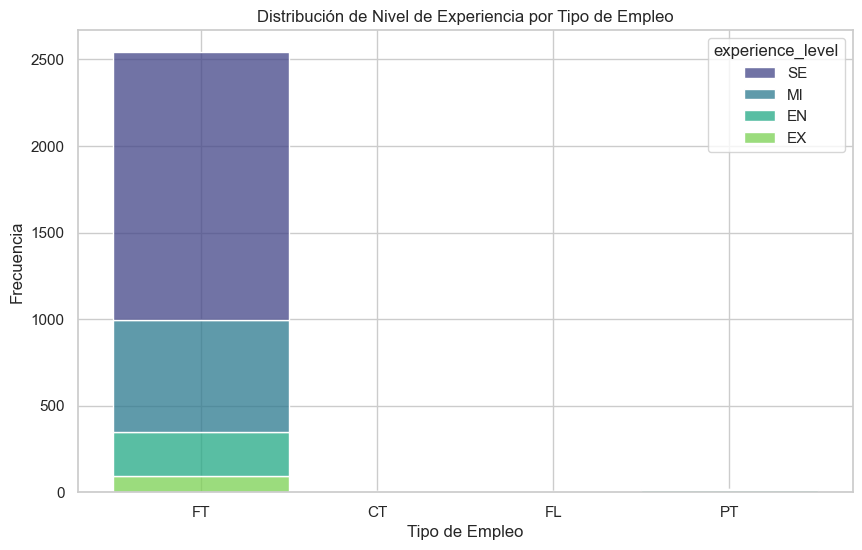

In [107]:
# Crear un gráfico de barras apiladas para mostrar el nivel de experiencia por tipo de empleo
plt.figure(figsize=(10, 6))
sns.histplot(data=df_limpio_sin_outliers, x='employment_type', hue='experience_level', multiple='stack', palette='viridis')
plt.title('Distribución de Nivel de Experiencia por Tipo de Empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Frecuencia')
plt.show()


Este gráfico muestra que el empleo a tiempo completo (FT) domina en la distribución de los tipos de empleo, con un enfoque claro en los empleados de nivel Senior (SE) y Mid (MI). Los tipos de empleo como Contratos (CT), Freelance (FL) y Medio Tiempo (PT) están escasamente representados. La representación limitada de empleados de nivel Executive (EX) también es consistente con las expectativas, ya que normalmente hay menos roles en los niveles más altos de las jerarquías organizacionales.

In [109]:
# Verificar la distribución de valores en la columna employment_type y experience_level
print(df_limpio_sin_outliers['employment_type'].value_counts())
print(df_limpio_sin_outliers['experience_level'].value_counts())


employment_type
FT    2541
PT      17
FL      10
CT       9
Name: count, dtype: int64
experience_level
SE    1554
MI     659
EN     269
EX      95
Name: count, dtype: int64


### 3. Análisis adicional

- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [114]:
df_limpio_sin_outliers.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,2577.00,2577.00,2577.00,2577.00
mean,2022.30,209935.94,132739.47,50.50
std,0.75,809087.22,65910.57,48.18
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,90000.00,84053.00,0.00
50%,2022.00,134024.00,129300.00,50.00
75%,2023.00,182000.00,175000.00,100.00
max,2023.00,30400000.00,423834.00,100.00


- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.


1. Relacion entre salario y nivel de experiencia: Los salarios aumentan a medida que los hace el nivel de experiencia. Los empleados de nivel Senior, y Executive ganas más que los de nivel Entry y Mid.
2. Distribución de salarios: La distribución indica que la mayoría de los empleados tienen salarios dentro del rango medio, y en menor proporción empleados con salarios altos. La mediana del salario es menor que la media, lo que indica que los outliers inflan esta y no es representativa.
3. La mayoría de los empleados trabajan a tiempo completo, entre estos, la mayoría son de nivel Senio y Mid. Los otros tipos de empleo están escasamento representados.